In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import suite2p
from suite2p import run_s2p, default_ops
ops = default_ops() # populates ops with the default options
import sys
sys.path.insert(0, 'C:/Users/lan/Documents/repos/suite2p') # option to import from github folder

import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': False,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))


In [8]:
t = 'D:\Lan_temp\suite2p\plane0_i1322_200803_002'
output_op = np.load(Path(t).joinpath('ops.npy'), allow_pickle=True).item()
output_op['save_path'] = t

In [31]:
f_cells = np.load(Path(output_op['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(output_op['save_path']).joinpath('Fneu.npy'))
# spks = np.load(Path(output_op['save_path']).joinpath('spks.npy'))

stats_file = Path(output_op['save_path']).joinpath('stat.npy')
stats = np.load(stats_file, allow_pickle=True)
iscell = np.load(Path(output_op['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
iscell.shape

(4349,)

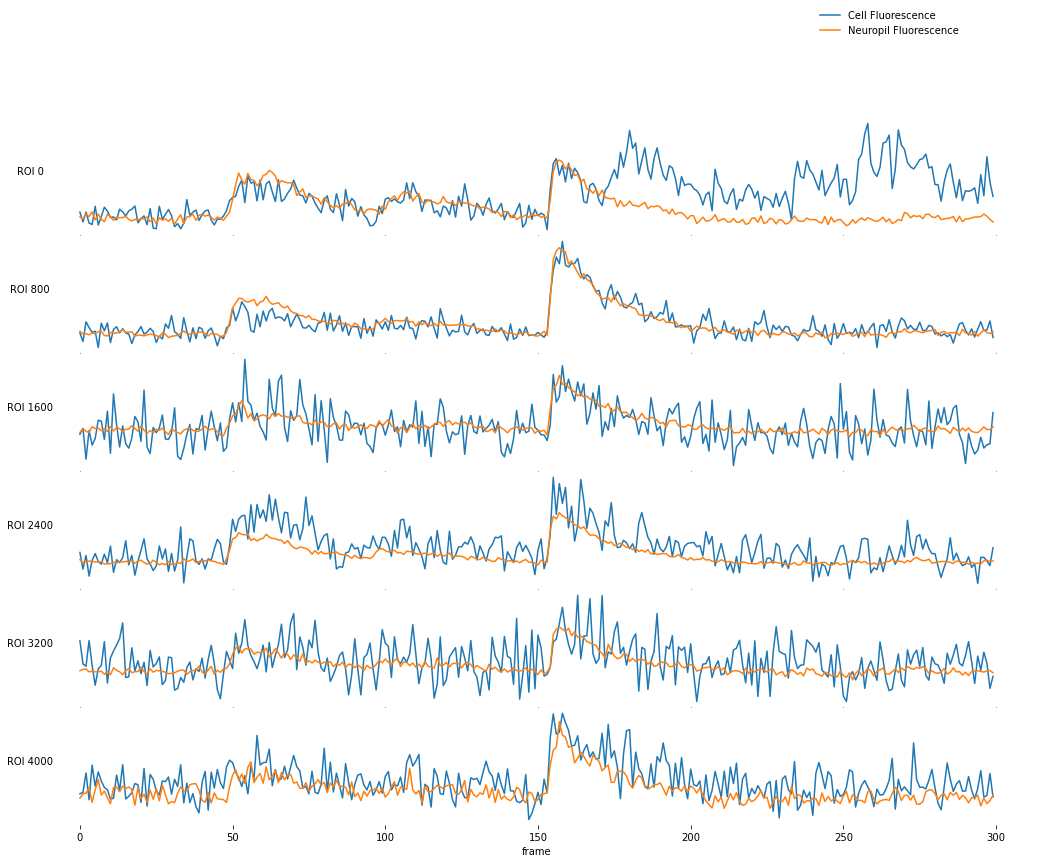

In [30]:
# plt.figure(figsize=[20,20])
# plt.suptitle("Flourescence and Deconvolved Traces for Different ROIs", y=0.92);
rois = np.arange(len(f_cells))[::800]

for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi]
    f_neu = f_neuropils[roi]
#     sp = spks[roi]
    
    # visualize some frames
    frame_range = np.arange(100,400)
    f = f[frame_range]
    f_neu = f_neu[frame_range]
#     sp = sp[frame_range]
    
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin 
#     sp /= sp.max()
#     sp *= frange
    
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
#     plt.plot(sp + fmin, label="Deconvolved")
#     plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
    plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: All-NaN slice encountered
  after removing the cwd from sys.path.


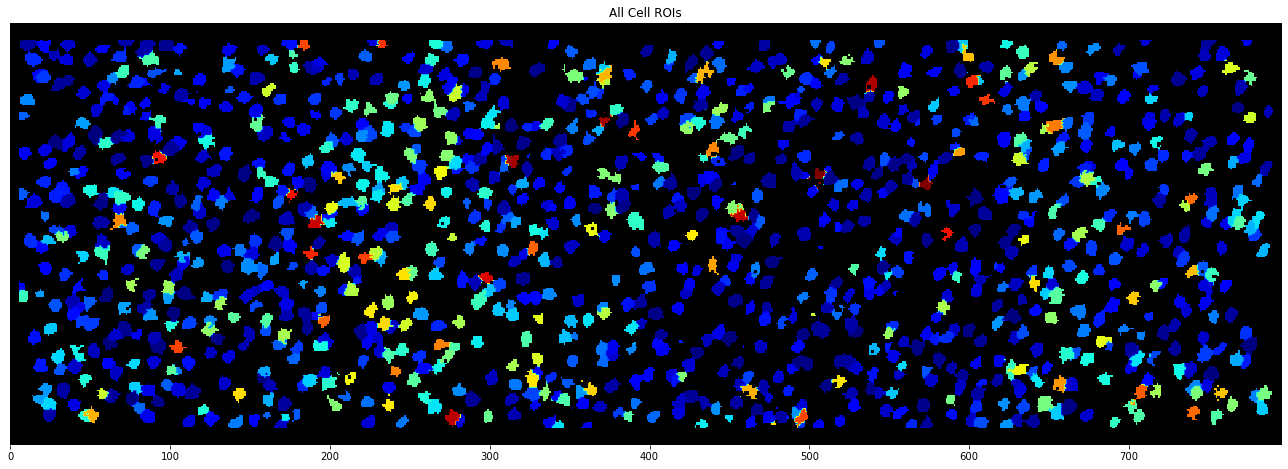

In [32]:
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=output_op['Ly'], Lx=output_op['Lx'], label_id=True)
im[im == 0] = np.nan

plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");

plt.tight_layout();

In [38]:
cd C:\Users\lan\Documents\repos\inter\code\py_playground

C:\Users\lan\Documents\repos\inter\code\py_playground


In [39]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 801D-6DAC

 Directory of C:\Users\lan\Documents\repos\inter\code\py_playground

02/04/2021  05:09 PM    <DIR>          .
02/04/2021  05:09 PM    <DIR>          ..
02/03/2021  04:27 PM    <DIR>          .ipynb_checkpoints
02/03/2021  04:03 PM           797,847 compare_registration_shift.ipynb
02/04/2021  05:06 PM           484,645 compare_responsive_cells.ipynb
02/04/2021  09:53 AM             3,596 debug.log
02/04/2021  04:54 PM         5,318,172 mask_cell_shift_align.mat
02/03/2021  08:00 PM         1,239,233 out.mat
01/22/2021  05:55 PM           710,543 plot_adp.ipynb
02/03/2021  04:03 PM         1,681,352 suite2p_reg_mean_img.mat
02/03/2021  03:54 PM    <DIR>          suite2p_test_deprecated
02/04/2021  05:03 PM         3,134,947 test_segmentation_ops_adjust.ipynb
01/28/2021  01:56 PM         2,352,856 test_segmentation_v1_dataset2.ipynb
01/20/2021  03:50 PM        39,092,428 test_tc_w_pandas.ipynb
              10 File(s)  

In [72]:
from scipy.io import loadmat
segment_ref = loadmat('mask_cell_shift_flat.mat')
tt = segment_ref['tt2']
tt.shape

(264, 796)

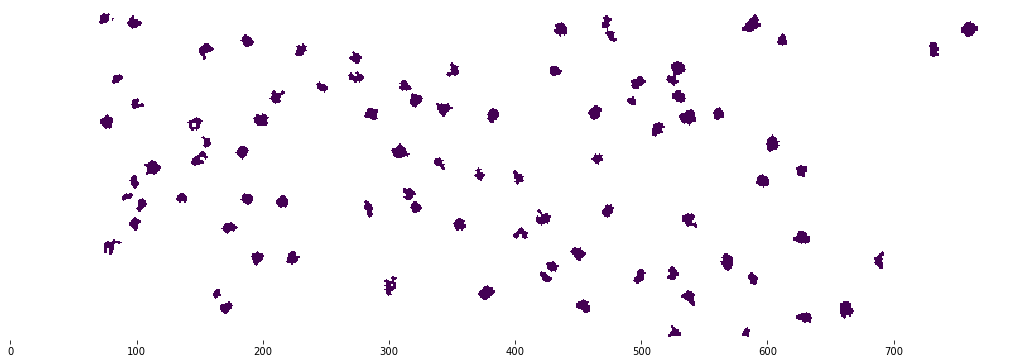

In [73]:
plt.imshow(tt)

In [44]:
segment_suite2p = np.nanmax(im[iscell], axis=0)
segment_suite2p.shape

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


(264, 796)

In [74]:
segment_suite2p_flat = segment_suite2p.copy()
# segment_suite2p_flat[segment_suite2p_flat>0] = 1 + np.random.normal(0, 500, len(segment_suite2p_flat[segment_suite2p_flat>0]))

# segment_ref_flat = tt.copy()
# segment_ref_flat[segment_ref_flat>0.0003] = 1

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


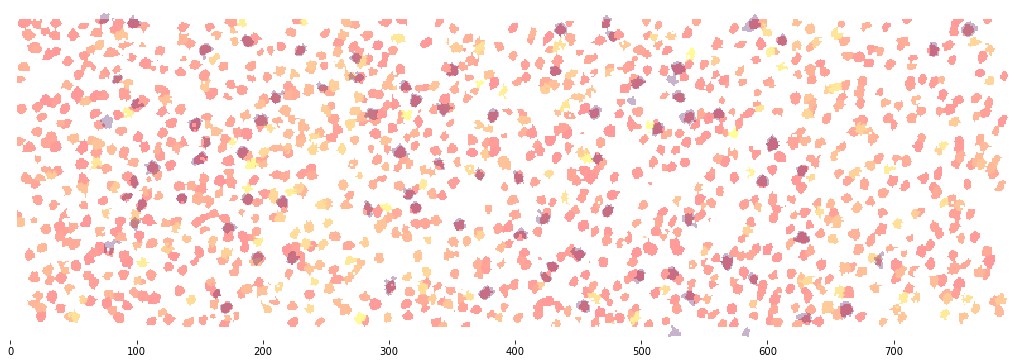

In [83]:
# im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
im1 = plt.imshow(segment_suite2p_flat, cmap='autumn', alpha=0.4)
im2 = plt.imshow(tt, cmap='viridis', alpha=0.3)
plt.show()

In [62]:
np.unique(tt).tolist()

[0.00011170828938289434,
 0.00035210072501774505,
 0.00037083828096587694,
 0.000404592936703042,
 0.00043431296998950437,
 0.0006281254922268782,
 0.0006387160962480069,
 0.000723727015414213,
 0.0007556853787956139,
 0.0007832211986022218,
 0.000810001834007554,
 0.0008479446576647468,
 0.0008952447735846097,
 0.000897287154077605,
 0.0009279148637236531,
 0.0009496833899245665,
 0.0009506962605537157,
 0.000993852974692841,
 0.00099804064367759,
 0.0009988597733321752,
 0.0010037661387343486,
 0.0010063395708166147,
 0.0010206510385324585,
 0.0010264634116701418,
 0.0010535587112022683,
 0.0010646561460982288,
 0.001079298273126139,
 0.0010811356220722867,
 0.0011128444872366143,
 0.0011154991736232597,
 0.0011368059849522498,
 0.0011662187732059681,
 0.0011753160795797868,
 0.0012061786608499078,
 0.0012245689552569966,
 0.0012281952819115714,
 0.0012288024310692118,
 0.001268967087123996,
 0.0012775022074768354,
 0.001300122718828667,
 0.0013089286620282974,
 0.001324201287959936,

In [63]:
tt.min()

0.00011170828938289434

In [64]:
tt.max()

127.56075449677374

In [66]:
tt.mean()

2.3451623355513425